In [1]:
### Import libraries

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [3]:
### Steps for creating the advanced line finding algorithm:
# -1- Camera Calibration
# -2- Distortion Correction
# -3- Colour and Gradient Threshold
# -4- Perspective Transform
# -5- Lane Shape Capture and Curvature Calculation

In [4]:
### Step 1 - Camera Calibration

In [5]:
# Use distorted and undistorted images of a chessboard to determine the distortion factors of the distortion camera

imgs = glob.glob('camera_cal//calibration*.jpg')

objpoints = [] # 3D real world coordinates
imgpoints = [] # 2D points in image space

# The object points can be created here because we are simply looking for a grid 
# and the corners represented in the same format as the output of the 
# findChessboardCorners function
objp = np.zeros((6*9, 3), np.float32) # 48x3 matrix
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # Filling in the x,y coordinates

# A function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use the function below to calculate the distortion coefficients and the camera matrix required to remove
    # the distortion from images
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    
    # Undistort the image once we have the required values
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist

# Read in the calibration images and use them to find the camera matrix
for img in imgs:
    img_2d = cv2.imread(img)
    gray = cv2.cvtColor(img_2d, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray)
    #plt.show()
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret == True:
        print(img)
        objpoints.append(objp) # The set of object points is copied into the array to be compared to the corresponding distorted dimensions
        imgpoints.append(corners)
        
        # Display the chessboard corners here if needed
        #img = cv2.drawChessboardCorners(img_2d, (9,6), corners, ret)
        #plt.imshow(img_2d)
        #plt.show()


camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
camera_cal\calibration20.jpg
camera_cal\calibration3.jpg
camera_cal\calibration6.jpg
camera_cal\calibration7.jpg
camera_cal\calibration8.jpg
camera_cal\calibration9.jpg


In [6]:
### Step 2 - Distortion Correction

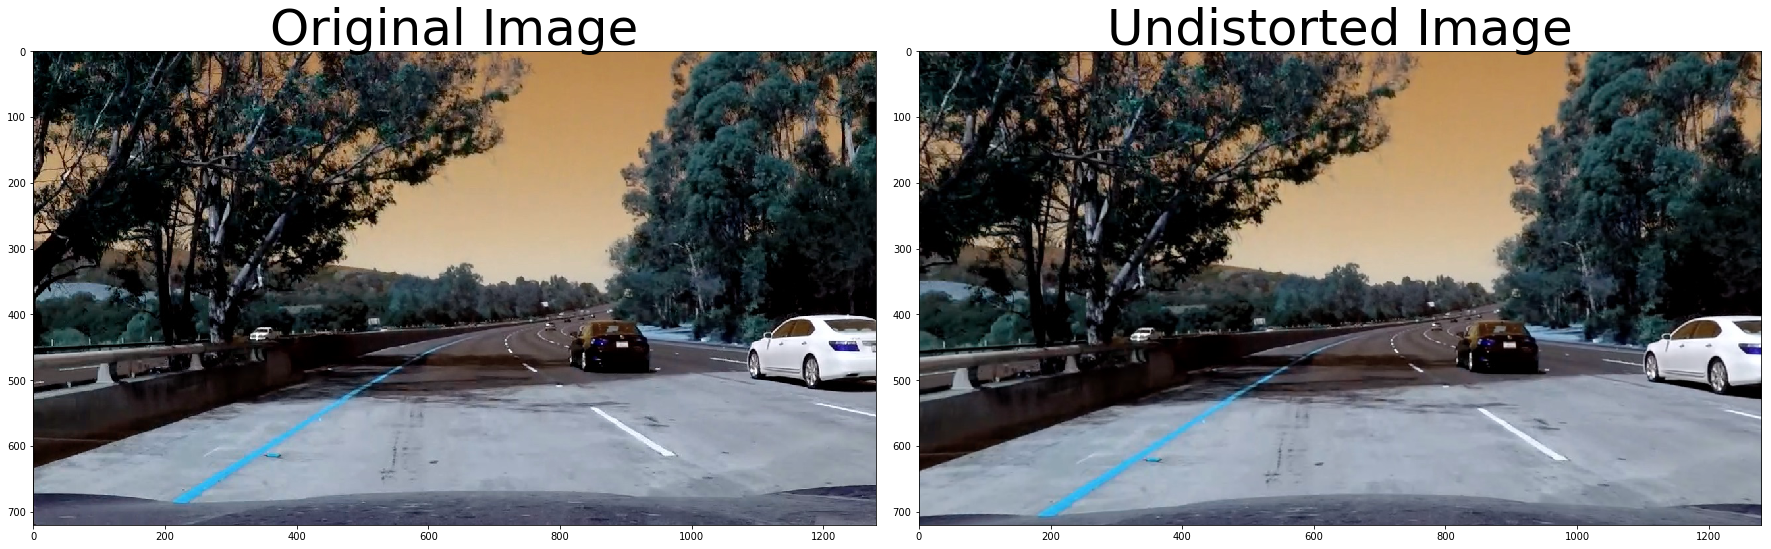

In [7]:
# Once the camera matrix is calculated, 
img_test = cv2.imread('.//test_images//test5.jpg')        
# undistorted = cal_undistort(img_test, objpoints, imgpoints)  # For Testing
undistorted = cal_undistort(img_test, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img_test)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [8]:
### Step 3 - Colour and Gradient Threshold

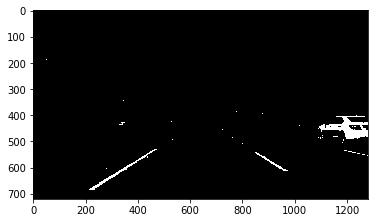

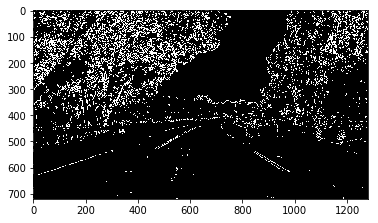

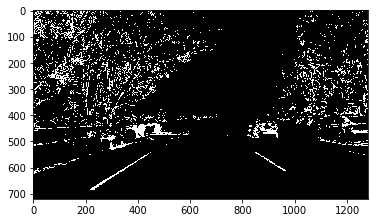

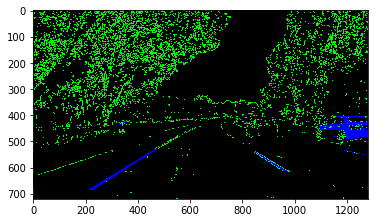

In [9]:
'''import PyQt5

%matplotlib qt5'''

# Convert the image to grayscale
gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY) 
             
# Take the gradient in the x-direction
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobelx = np.absolute(sobelx)
sobelx = np.uint8(255*sobelx/np.max(sobelx))

# Define minimum and maximum threshold values
min_thresh = 20
max_thresh = 70

# Create a binary mask using this information
sobelx_bin = np.zeros_like(sobelx)
sobelx_bin[(sobelx >= min_thresh) & (sobelx <= max_thresh)] = 1

# Extract the saturation information from the original image
# Convert to HLS color space and separate the S channel
# Note: img is the undistorted image
hls = cv2.cvtColor(img_test, cv2.COLOR_BGR2HLS)
#h_channel = hls[:,:,0]
#l_channel = hls[:,:,1]
s_channel = hls[:,:,2]

# Define thresholds and create s-channel binary mask
s_min_thresh = 190
s_max_thresh = 255
s_channel_bin = np.zeros_like(s_channel)
s_channel_bin[(s_channel >= s_min_thresh) & (s_channel <= s_max_thresh)] = 1 # modify

# Black channel
black_channel = np.zeros_like(s_channel)

# Red channel
red_channel = img_test[:,:,2]
min_thresh_red = 220
max_thresh_red = 255
red_channel_bin = np.zeros_like(red_channel)
red_channel_bin[(red_channel >= min_thresh_red) & (red_channel <= max_thresh_red)] = 1
stacky = np.dstack((black_channel, sobelx_bin, red_channel_bin)) * 255

plt.imshow(red_channel_bin, cmap='gray')
plt.show()
plt.imshow(sobelx_bin, cmap='gray')
plt.show()
plt.imshow(s_channel_bin, cmap='gray')
plt.show()
plt.imshow(stacky, cmap='gray')
plt.show()

In [10]:
### Step 4 - Perspective Transform

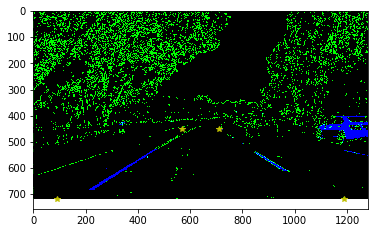

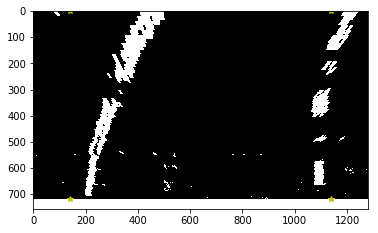

(720, 1280)


In [74]:
'''import PyQt5

%matplotlib qt5'''

# Define transformation points
base_setup = 550
offset_setup = 70
farpoint = 450
dst_offset = 50
src = np.float32([[int(img_test.shape[1]/2)-offset_setup, farpoint], [int(img_test.shape[1]/2)+offset_setup, farpoint], [int(img_test.shape[1]/2)-base_setup, int(img_test.shape[0])], [int(img_test.shape[1]/2)+base_setup, int(img_test.shape[0])]])
dst = np.float32([[int(img_test.shape[1]/2)-base_setup+dst_offset, 0], [int(img_test.shape[1]/2)+base_setup-dst_offset, 0], [int(img_test.shape[1]/2)-base_setup+dst_offset, int(img_test.shape[0])], [int(img_test.shape[1]/2)+base_setup-dst_offset, int(img_test.shape[0])]])
img_size = stacky.shape[1], stacky.shape[0]

# Find the coordinates
plt.imshow(stacky, cmap='gray')
for i in range(src.shape[0]):
    plt.plot(src[i,0], src[i,1], '*y')
plt.show()

# Calculate the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst,src)

# Create a resulting warped image
warped = cv2.warpPerspective(stacky, M, img_size, flags=cv2.INTER_LINEAR)

# Create a binary mask
warped_hls = cv2.cvtColor(warped, cv2.COLOR_BGR2HLS)

# Plot the histogram of the line
#plt.plot(warped_hls[290,:,2])

# Display the transformed image
plt.figure()
plt.imshow(warped_hls[:,:,2], cmap='gray')
for i in range(src.shape[0]):
    plt.plot(dst[i,0], dst[i,1], '*y')
plt.show()

binary_warped = warped_hls[:,:,2]
print(binary_warped.shape)

In [75]:
'''from scipy.signal import hilbert
print(warped.shape)

# Using smaller block sizes will yield a more accurate result
n_blocks = 200
offset = 0 # Added for robustness to outliers
peaks = np.zeros([n_blocks,warped.shape[1]])
peak_left_x = np.zeros([n_blocks])
peak_left_y = np.zeros([n_blocks])
peak_right_x = np.zeros([n_blocks])
peak_right_y = np.zeros([n_blocks])

# Go through the entire image and figure out what the expected coordinates are for 
# each of the blocks and save them
for i,j in enumerate(range(0,warped.shape[0],int(warped.shape[0]/n_blocks+1))):
    peaks[i,:] = np.sum(hilbert(warped[j:j+n_blocks-1,:,2]), axis=0)
    peak_left_x[i] = np.argmax(peaks[i,:int(warped.shape[1]/2)])
    peak_left_y[i] = j
    peak_right_x[i] = 640+np.argmax(peaks[i,int(warped.shape[1]/2):])
    peak_right_y[i] = j

    #assert "Houston, we have a problem"

# Set conditions to avoid outliers
cond_right_x = peak_right_x[peak_right_x!=0][0+offset:(peak_right_x[peak_right_x!=0]).shape[0]-offset]
cond_right_y = peak_right_y[peak_right_x!=0][0+offset:(peak_right_y[peak_right_x!=0]).shape[0]-offset]
cond_left_x = peak_left_x[peak_left_x!=0][0+offset:(peak_left_x[peak_left_x!=0]).shape[0]-offset]
cond_left_y = peak_left_y[peak_left_x!=0][0+offset:(peak_left_y[peak_left_x!=0]).shape[0]-offset]

# Draw a line of best fit for the data
p2_left = np.poly1d(np.polyfit(cond_left_y, cond_left_x, 2))
p2_right = np.poly1d(np.polyfit(cond_right_y, cond_right_x, 2))
plt.imshow(warped)
_ = plt.plot(peak_left_x, peak_left_y, '.y', p2_left(peak_left_y), peak_left_y, '*w')
_ = plt.plot(peak_right_x, peak_right_y, '.y', p2_right(peak_right_y), peak_right_y, '*w')
plt.show()'''

# Plot the resulting values
'''plt.figure()
plt.imshow(warped)
plt.plot((peak_left_x), peak_left_poly(peak_left_x), 'r')
plt.plot(peak_right_x, peak_right_y, 'g')
print(peak_left_x.shape)
print(peak_right_x.shape)'''

'''plt.show()
plt.figure()
plt.plot(peaks, 'r')
plt.show()'''

"plt.show()\nplt.figure()\nplt.plot(peaks, 'r')\nplt.show()"

In [76]:
### Step 5 - Lane Shape Capture and Curvature Calculation

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[int(binary_warped.shape[0]/2):,:], axis=0)
# Create an output image to draw on and visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]/2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 10
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

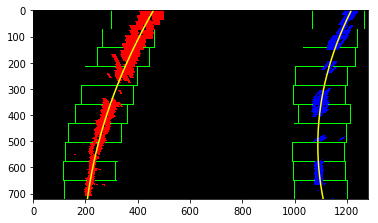

In [78]:
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

In [79]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
left_fit[1]*nonzeroy + left_fit[2] + margin))) 

right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
right_fit[1]*nonzeroy + right_fit[2] + margin)))  

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

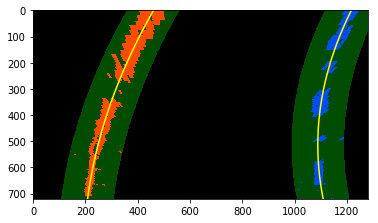

In [80]:
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

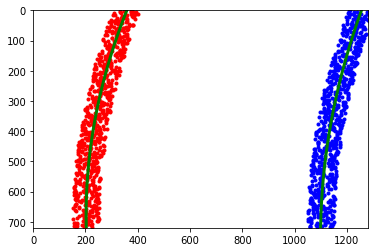

In [88]:
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([1100 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
plt.show()

In [89]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

1480.50807848 1806.57757197


In [90]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m


485.736579633 m 593.094117496 m


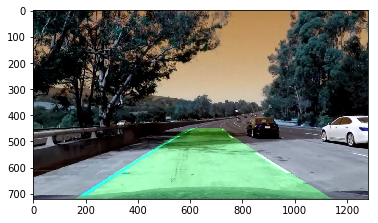

In [91]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped[:,:,1]).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (img_test.shape[1], img_test.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undistorted, 1, newwarp, 0.3, 0)
plt.imshow(result)
plt.show()